In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings 
warnings.filterwarnings("ignore")

In [5]:
# Extracting intelligence from the train data source
train_data = pd.read_csv('train.csv')

# Revealing insights clandestinely - behold!
train_data.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [6]:
# Extracting intelligence from the train data source
test_data = pd.read_csv('test.csv')

# Revealing insights clandestinely - behold! 
test_data.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [7]:
# Delve into the training dataset for revelations

train_data.info()

train_data.describe()

train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
# Preparing the training dataset for analysis

# Eliminating rows containing incomplete information
train_data.dropna(inplace=True)

# Discarding redundant rows
train_data.drop_duplicates(inplace=True)

# Managing extreme values (for numerical columns)
# Create a function to identify and manage outliers using the Z-score technique.
def handle_outliers(train_data, columns):
    from scipy import stats
    for col in columns:
        z_scores = stats.zscore(train_data[col])
        abs_z_scores = abs(z_scores)
        filtered_entries = (abs_z_scores < 3)
        train_data = train_data[filtered_entries]
    return train_data

# Identify numerical columns to detect and eliminate outliers.
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Eliminate outliers from numeric columns
train_data = handle_outliers(train_data, numeric_columns)

# Show the DataFrame after cleaning
train_data.head()


id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

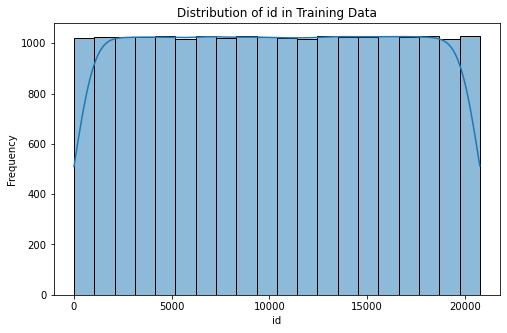

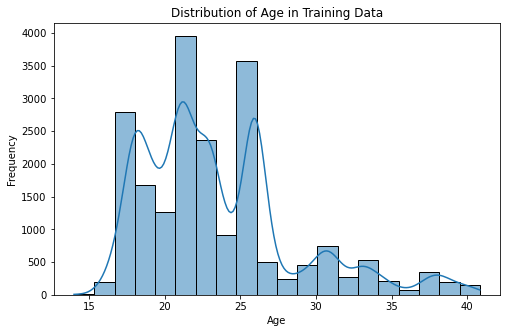

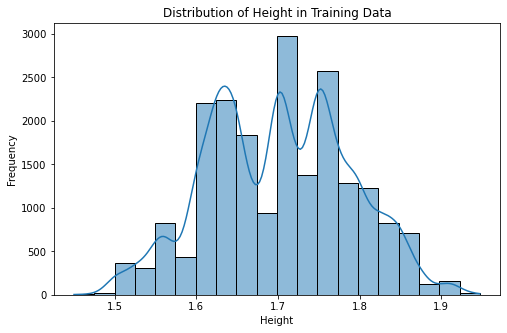

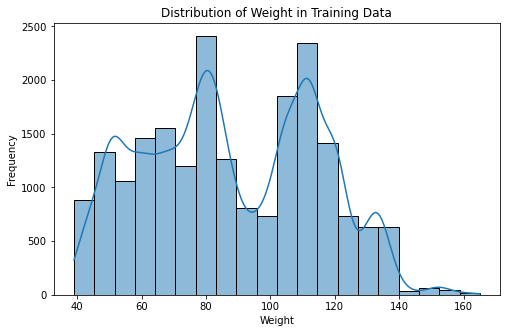

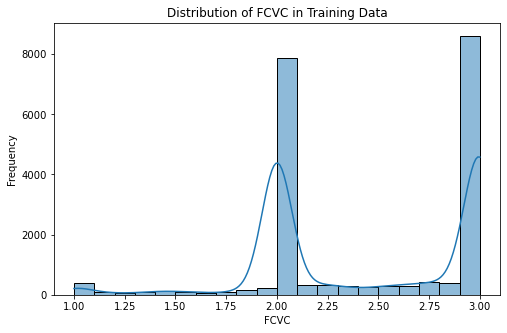

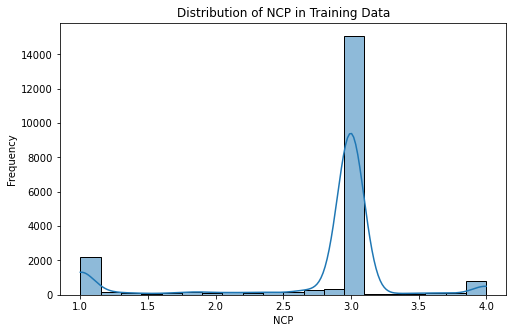

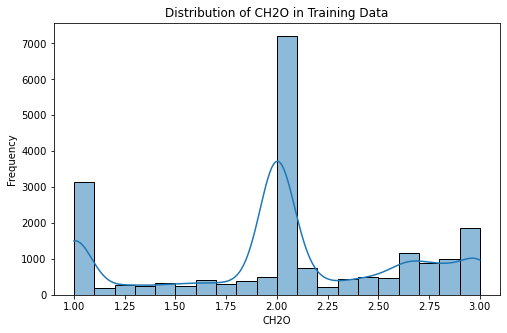

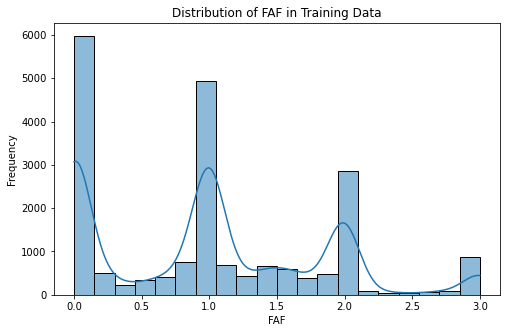

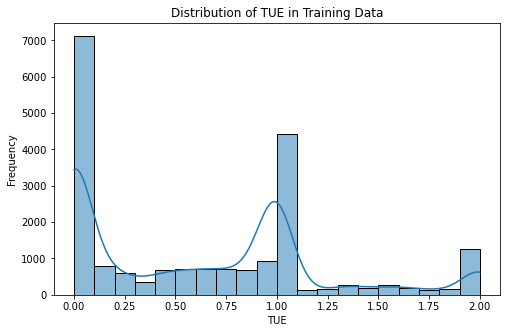

In [6]:
# Examine the distributions of numerical attributes within the training dataset

numerical_features_train = train_data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features_train:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature} in Training Data')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

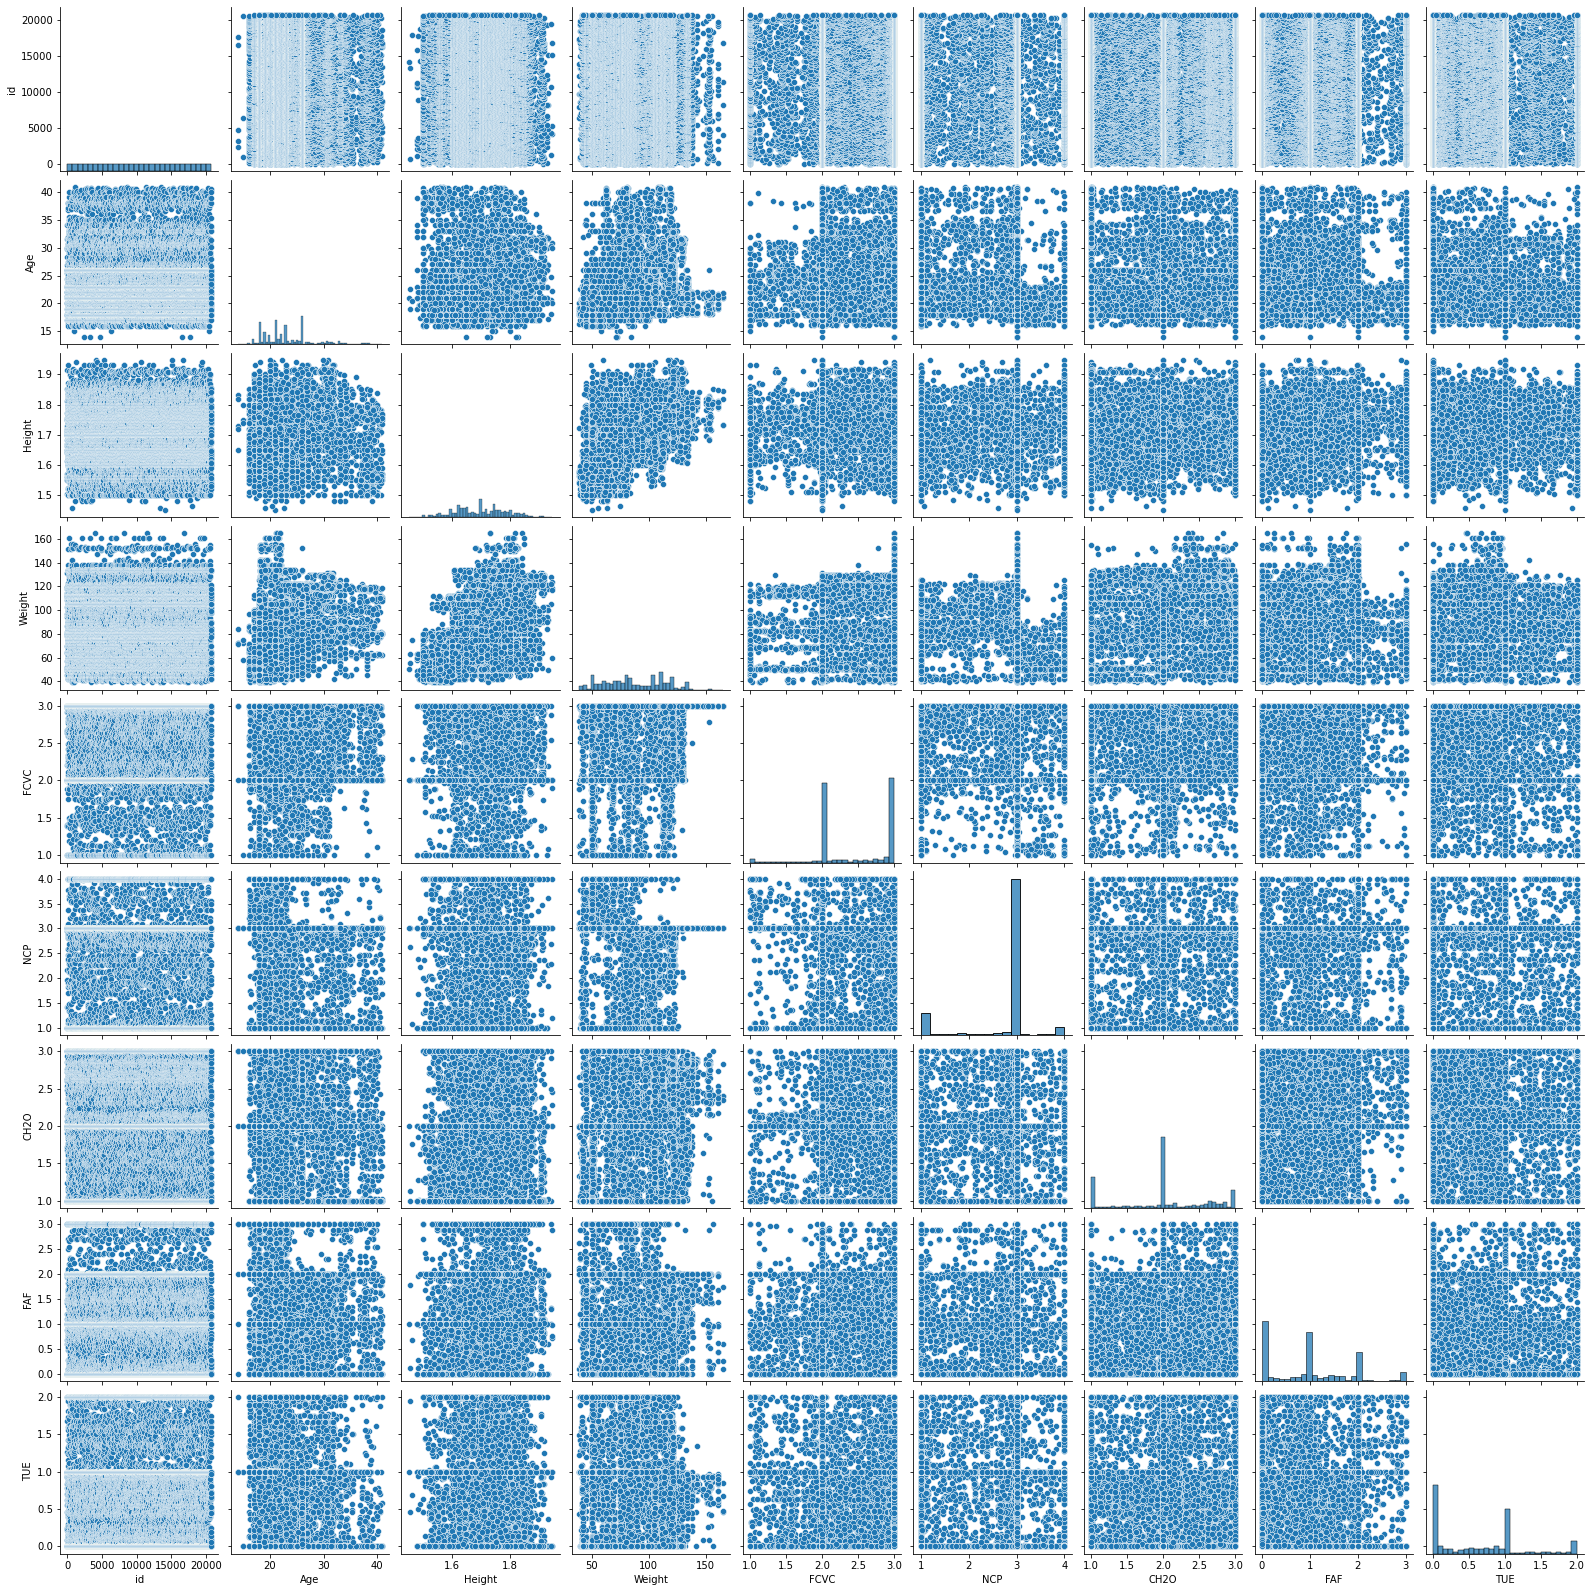

In [7]:
# Plotting pairwise relationships within the refined dataset
sns.pairplot(train_data)
plt.show()

In [8]:
# Investigate the testing dataset

test_data.info()

test_data.describe()

test_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

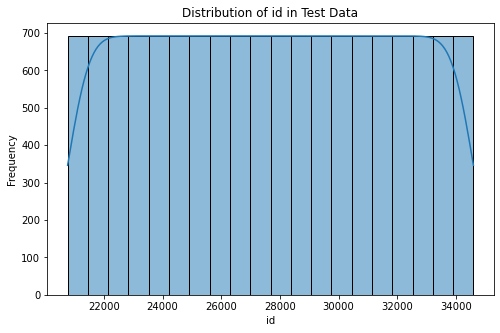

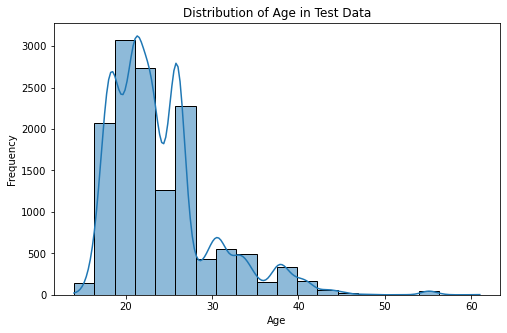

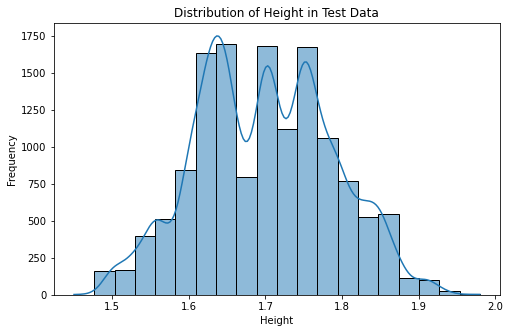

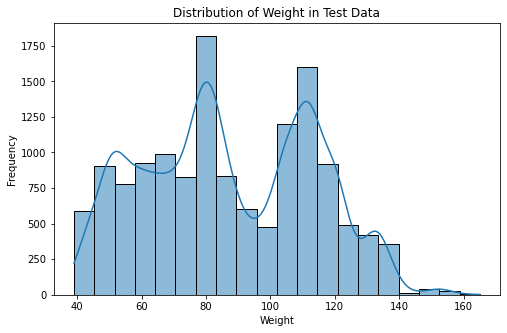

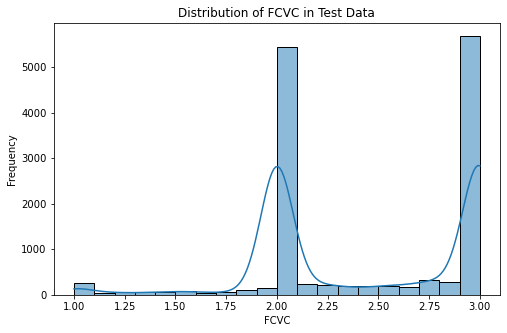

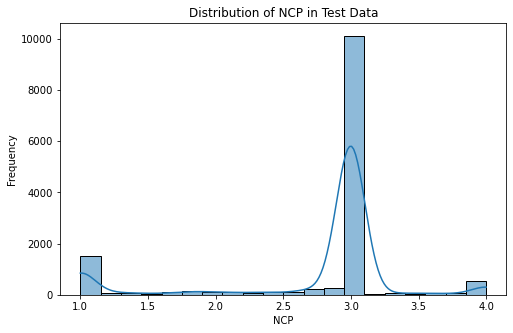

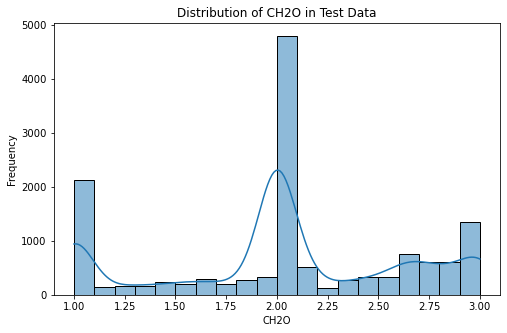

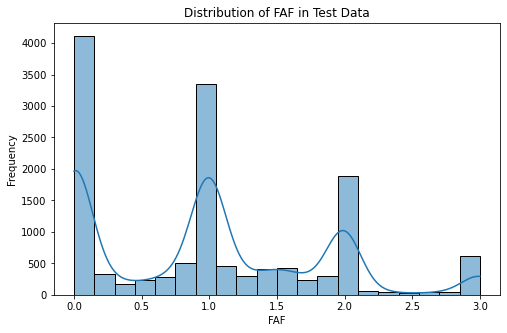

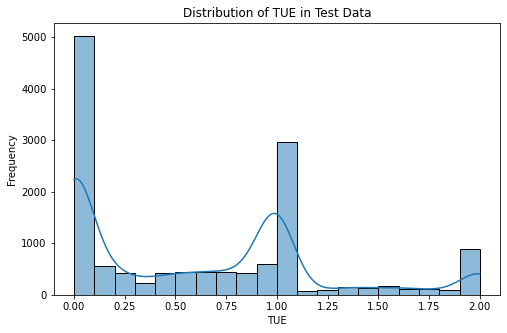

In [9]:
# Examine the distributions of numerical attributes within the test dataset

numerical_features_test = test_data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features_test:
    plt.figure(figsize=(8, 5))
    sns.histplot(test_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature} in Test Data')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

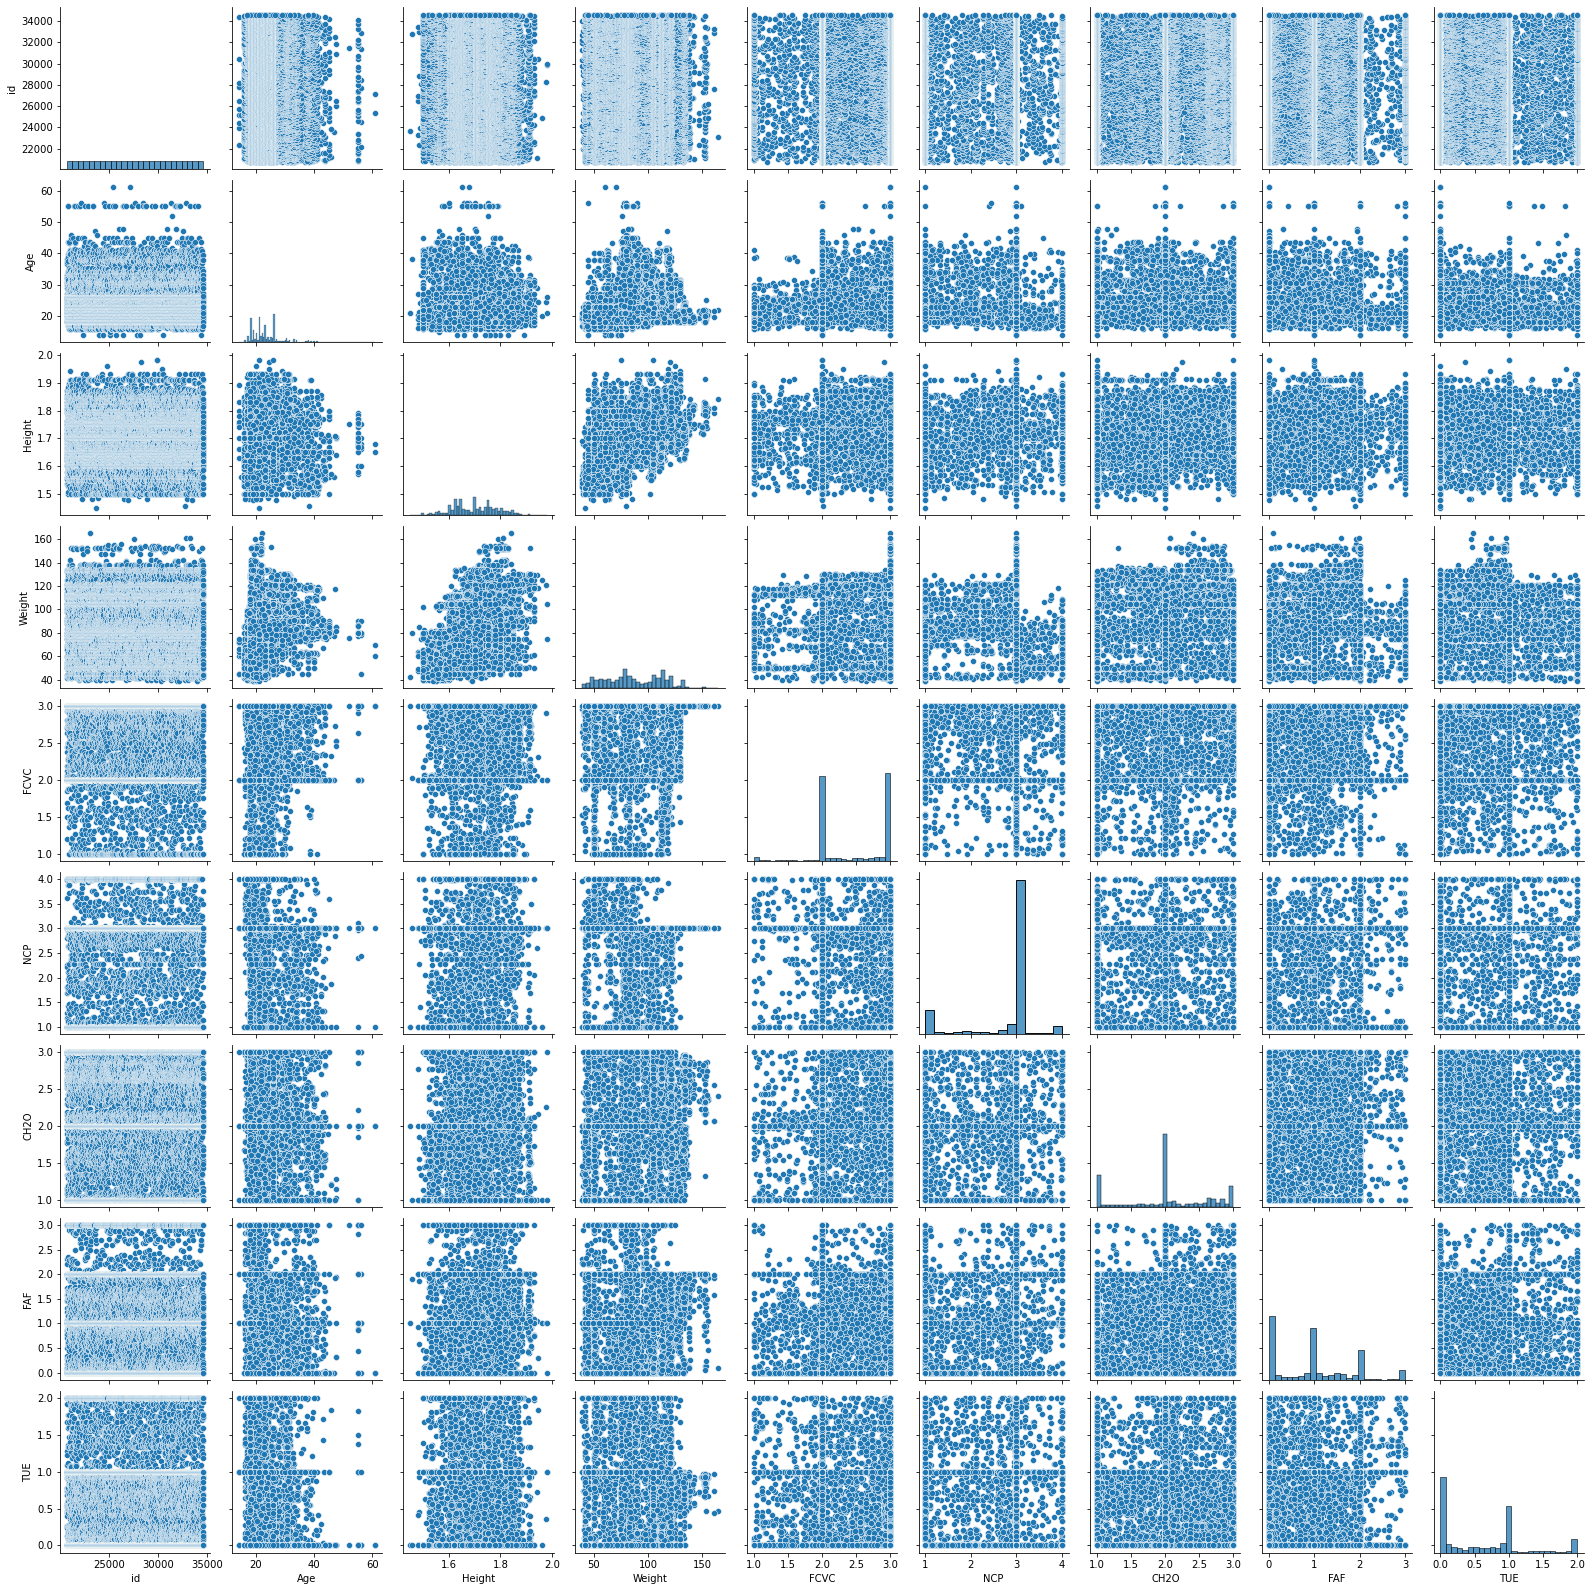

In [10]:
# Visualizing relationships between pairs of variables in the cleaned dataset
sns.pairplot(test_data)
plt.show()

In [11]:
train_data.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [12]:
# Preparing the training data for further analysis.

# Performing one-hot encoding for all columns except 'NObeyesdad'
train_data_encoded = pd.get_dummies(train_data.drop(columns=['NObeyesdad']))

# Concatenate the one-hot encoded columns with the 'NObeyesdad' column
train_data_encoded = pd.concat([train_data_encoded, train_data['NObeyesdad']], axis=1)

# Showing the initial rows of the encoded DataFrame
train_data_encoded.head()

id        Age    Height      Weight      FCVC       NCP      CH2O  \
0   0  24.443011  1.699998   81.669950  2.000000  2.983297  2.763573   
1   1  18.000000  1.560000   57.000000  2.000000  3.000000  2.000000   
2   2  18.000000  1.711460   50.165754  1.880534  1.411685  1.910378   
3   3  20.952737  1.710730  131.274851  3.000000  3.000000  1.674061   
4   4  31.641081  1.914186   93.798055  2.679664  1.971472  1.979848   

        FAF       TUE  Gender_Female  ...  SCC_yes  CALC_Frequently  \
0  0.000000  0.976473              0  ...        0                0   
1  1.000000  1.000000              1  ...        0                0   
2  0.866045  1.673584              1  ...        0                0   
3  1.467863  0.780199              1  ...        0                0   
4  1.967973  0.931721              0  ...        0                0   

   CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0               1        0                  0            0                 0   
1               0        1                  1            0                 0   
2               0        1                  0            0                 0   
3               1        0                  0            0                 0   
4               1        0                  0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking           NObeyesdad  
0                             1               0  Overweight_Level_II  
1                             0               0        Normal_Weight  
2                             1               0  Insufficient_Weight  
3                             1               0     Obesity_Type_III  
4                             1               0  Overweight_Level_II  

[5 rows x 32 columns]

In [13]:
# Preprocessing Test Data

# One-hot encode all columns except 'NObeyesdad'
test_data_encoded = pd.get_dummies(test_data)

# Display the first few rows of the encoded DataFrame
test_data_encoded.head()


id        Age    Height      Weight      FCVC       NCP      CH2O  \
0  20758  26.899886  1.848294  120.644178  2.938616  3.000000  2.825629   
1  20759  21.000000  1.600000   66.000000  2.000000  1.000000  3.000000   
2  20760  26.000000  1.643355  111.600553  3.000000  3.000000  2.621877   
3  20761  20.979254  1.553127  103.669116  2.000000  2.977909  2.786417   
4  20762  26.000000  1.627396  104.835346  3.000000  3.000000  2.653531   

        FAF       TUE  Gender_Female  ...  SCC_yes  CALC_Always  \
0  0.855400  0.000000              0  ...        0            0   
1  1.000000  0.000000              1  ...        0            0   
2  0.000000  0.250502              1  ...        0            0   
3  0.094851  0.000000              0  ...        0            0   
4  0.000000  0.741069              1  ...        0            0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  \
0                0               1        0                  0            0   
1                0               1        0                  0            0   
2                0               1        0                  0            0   
3                0               1        0                  0            0   
4                0               1        0                  0            0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0                 0                             1               0  
1                 0                             1               0  
2                 0                             1               0  
3                 0                             1               0  
4                 0                             1               0  

[5 rows x 32 columns]

In [14]:

# Given that `train_data_encoded` holds the encoded training data and 'NObeyesdad' represents the target column.

# Dividing the data into features (X) and target (y)
X = train_data_encoded.drop(columns=['NObeyesdad'])
y = train_data_encoded['NObeyesdad']

# Partitioning the data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column using the LabelEncoder instance
y_train_encoded = label_encoder.fit_transform(y_train)

# Initializing an XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax',random_state=42, num_class=len(label_encoder.classes_))

# Specifying the grid of hyperparameters
param_grid = {
    'max_depth': [3, 6, 10],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.02,0.06],  # Learning rate
    'n_estimators': [100, 200, 400],  # Number of trees (boosting rounds)
}

# Creating an instance of GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Training the grid search
grid_search.fit(X_train, y_train_encoded)

# Retrieve the best parameters from the GridSearchCV results
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Obtain the best model from the GridSearchCV results
best_model = grid_search.best_estimator_

# Generating predictions on the validation set using the best model
y_pred_valid = best_model.predict(X_valid)

#Applying the same label encoder used for the training set to transform the target column of the validation set
y_valid_encoded = label_encoder.transform(y_valid)

# Calculating the accuracy
accuracy = accuracy_score(y_valid_encoded, y_pred_valid)

# Printing the accuracy
print("Validation Accuracy:", accuracy)

# Utilizing the best model to make predictions on the test set
test_data_encoded = test_data_encoded[X.columns]
y_pred_test = best_model.predict(test_data_encoded)

# Converting the numerical labels back to their original string representations
y_pred_test_original = label_encoder.inverse_transform(y_pred_test)

# Generating a DataFrame containing the predictions
test_data_with_predictions = pd.DataFrame({'id': test_data_encoded['id'], 'NObeyesdad': y_pred_test_original})

#Printing the DataFrame containing the predictions.
print(test_data_with_predictions)


Best Parameters: {'learning_rate': 0.06, 'max_depth': 3, 'n_estimators': 400}
Validation Accuracy: 0.903564453125
          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [15]:
# Saving the DataFrame to a CSV file
test_data_with_predictions[['id', 'NObeyesdad']].to_csv('Comp1_ge5649.csv', index=False)
